In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import time
from matplotlib.collections import PatchCollection
%matplotlib inline

In [156]:
viewingDistance = 100
radius = 20
speed = 5
dotNum = 1000
timePoints = 100
pixelsPerDegree = 10 

In [157]:
#pick dots at random screen positions with respect to center point
pos = np.random.randint(1, high=100, size=dotNum*2).reshape(dotNum,2)
centerPos=np.array([50,50])

#find how far they are from center and find unit vectors along which to move them
distToCenter = np.sqrt(np.sum((pos - centerPos)**2, axis=1))
unitVectors = (pos - centerPos)/distToCenter[:, None]

In [158]:
#find the visual angle at which each dot lives
theta = np.deg2rad(distToCenter/pixelsPerDegree)

#find the "time point" when each dot would reach its visual angle if it had started at the original viewing distance
virtualTimePoint = (viewingDistance - (radius/np.tan(theta)))/speed

#probably unnecessary
newTheta = np.copy(theta)
newPos = np.copy(pos)

In [159]:
#Function to repopulate dots that are past 90 degrees visual angle
def repop(repopInds, distToCenter, newPos, unitVectors, newTheta, virtualTimePoint):
    newPos[repopInds] = np.random.randint(1, high=100, size=2*repopInds.size).reshape(repopInds.size,2)
    distToCenter[repopInds] = np.sqrt(np.sum((newPos[repopInds] - centerPos)**2, axis=1))
    unitVectors[repopInds] = (newPos[repopInds] - centerPos)/distToCenter[repopInds, None]
    newTheta[repopInds] = np.deg2rad(distToCenter[repopInds]/pixelsPerDegree)
    virtualTimePoint[repopInds] = (viewingDistance - (radius/np.tan(newTheta[repopInds])))/speed
    
    return distToCenter, newPos, unitVectors, newTheta, virtualTimePoint

#Function to redraw dots for the next time point
def redraw(distToCenter, newPos, unitVectors, newTheta, virtualTimePoint):
    #increment "time point" for each dot
    virtualTimePoint += 1
    
    #find new visual angle at that time point
    newTheta = np.arctan(radius/(viewingDistance - speed*(virtualTimePoint+1)))
    
    #repop if necessary
    if any(np.rad2deg(newTheta)<0):
        repopInds = np.where(np.rad2deg(newTheta)<0)[0]
        distToCenter, newPos, unitVectors, newTheta, virtualTimePoint = repop(repopInds, distToCenter, pos, unitVectors, newTheta, virtualTimePoint)
    
    #convert angle to pixels and update dot positions
    newThetaPix = np.rad2deg(newTheta)*pixelsPerDegree
    newPos = unitVectors*newThetaPix[:, None] + centerPos
    
    return distToCenter, newPos, unitVectors, newTheta, virtualTimePoint
    
pos_array = []
for i in np.arange(timePoints):
    distToCenter, newPos, unitVectors, newTheta, virtualTimePoint = redraw(distToCenter, newPos, unitVectors, newTheta, virtualTimePoint)
    pos_array.append(newPos)
    

In [160]:
pos_array = np.array(pos_array)
pos_array.shape

(100L, 1000L, 2L)

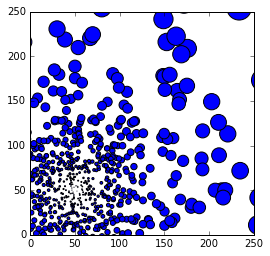

In [164]:
from ipywidgets import widgets, interact, interactive
from IPython.display import display
from IPython.display import Image

scaleFactor = 1/20.
def f(x=0):
    patches = []
    for p in pos_array[x]:
        dist = ((p[0] - centerPos[0])**2 + (p[1]-centerPos[1])**2)**0.5
        radius = dist*scaleFactor
        patches.append(matplotlib.patches.Circle((p[0], p[1]), radius=radius))
    
    collection = PatchCollection(patches)
    ax = plt.gca()
    ax.add_collection(collection)
    ax.set_ylim([0, 250])
    ax.set_xlim([0, 250])
    ax.set_aspect('equal')
interact(f, x=(0,timePoints-1,1));

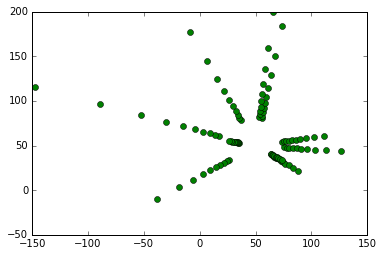

In [60]:
for i in np.arange(10):
    
    newTheta = np.arctan(radius/(viewingDistance - speed*(virtualTimePoint+1*i +1)))
    
    if any(np.rad2deg(newTheta)<0):
        print('over 90')
        repopInds = np.where(np.rad2deg(newTheta)<0)[0]
        distToCenter, pos, unitVectors, newTheta, virtualTimePoint = repop(repopInds, distToCenter, pos, unitVectors, newTheta, virtualTimePoint)
        
    newThetaPix = np.rad2deg(newTheta)*pixelsPerDegree
    
    newPos = unitVectors*newThetaPix[:, None] + centerPos
    
    plt.plot(newPos[:, 0], newPos[:,1], 'go')

In [61]:
from ipywidgets import widgets, interact, interactive
from IPython.display import display
from IPython.display import Image

In [118]:
pos_array.max()

930.8954270223052

In [48]:
newTheta

array([ 0.23836268,  0.09640797, -1.03597379,  0.27570835,  0.3346154 ,
        0.31922219,  0.34719704,  0.22946738,  0.18023902,  0.18515434])

In [49]:
virtualTimePoint[repopInds] = (viewingDistance - (radius/np.tan(newTheta[repopInds])))/speed

In [50]:
virtualTimePoint

array([10.76893847, -1.68086039, 21.18482705, 11.93070176, 13.24774887,
       12.94904605, 13.47292867, 10.43768217,  8.02404406,  8.32192034])

In [43]:
repopInds.size

1

In [124]:
p = pos_array[0]
p.shape

(100L, 2L)

In [125]:
p = pos_array[0][0]
p.shape

(2L,)